![banResterLivre](baniere.jpg)

# <span style="color:purple">Analyse des ventes de l'entreprise "Rester livres"</span>

## <span style="color:#00468b">Description et nettoyage des données</span>
   
Le service informatique de la société a mis à notre disposition 3 fichiers pour notre analyse :
- les ventes (appelées “Transactions”) ;
- la liste des clients ;
- la liste des produits.

### Sommaire

[1. Description et analyse du fichier clients](#clients)     
[2. Description et analyse du fichier produits](#products)     
[3. Description et analyse du fichier transactions](#transactions)     
[4. Création d'un dataframe global](#global)     
[5. Données manquantes sur le Dataframe étendu](#manquant)

In [1]:
# Librairies nécessaires à l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importation des CSV dans des DataFrames Pandas
df_customers = pd.read_csv("imports/customers.csv", sep=",", header=0 )
df_products = pd.read_csv("imports/products.csv", sep=",", header=0, decimal='.')
df_transactions = pd.read_csv("imports/transactions.csv", sep=",", header=0, decimal='.', parse_dates=[1])

### <span style="color:#D97904" id="clients">Description et analyse du fichier clients :</span>

In [3]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
df_customers.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_7888,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


<div class="alert alert-block alert-info">
<b>Description du fichier "customers" :</b> D'après les premières analyses, le fichier client peut être décrit ainsi :<br/>
    - <b>Pas de doublons</b> : 8623 entrées pour le même nombre de valeurs uniques sur la variable client_id.<br/>
- <b>Pas de valeurs nulles</b> : Toutes les entées de chaque colonne sont affectées à une valeur (*.info()*).<br/>
- <b>Pas d'outliers</b> : Sur la variable birth les années de naissances s'étendent de 1929 à 2004 ce qui est cohérent.
</div>

### <span style="color:#D97904" id="products">Description et analyse du fichier produits :</span>

In [6]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [7]:
df_products.describe(include = 'all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_2238,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [8]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [9]:
df_products[df_products['price'] < 0]

,id_prod,price,categ
731,T_0,-1.0,0


<div class="alert alert-block alert-info">
<b>Description du fichier "products" :</b> D'après les premières analyses, le fichier produits peut être décrit ainsi :<br/>
- <b>Pas de doublons</b> : 3287 entrées pour le même nombre de valeurs uniques sur la variable id_prod.<br/>
- <b>Pas de valeurs nulles</b> : Toutes les entées de chaque colonne sont affectées à une valeur (*.info()*).<br/>
- <b>Outliers</b> : 1 produit a une valeur négative : T_0. Ce n'est pas incohérent il peut s'agir par exemple d'une remise ou d'un produit test.
</div>

### <span style="color:#D97904" id="transactions">Description et analyse du fichier transactions :</span>

In [10]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [11]:
df_transactions.describe(include = 'all')

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


In [12]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


On remarque dans le ***describe()*** que des dates sont identifiées comme ***test***.
Regardons ces lignes de plus près :

<div class="alert alert-block alert-info">
<b>Traitement :</b> Nous allons donc convertir les données de l'attribut <em>date</em> au format date.<br/>
    Les données qui ne sont pas considérées comme telles seront <b>marquées comme nulles</b>.
</div>

In [13]:
df_transactions['date'] = pd.to_datetime(df_transactions['date'], errors = 'coerce')
df_transactions_test = df_transactions[pd.isnull(df_transactions['date']) == True]
df_transactions_test

,id_prod,date,session_id,client_id
1431,T_0,NaT,s_0,ct_1
2365,T_0,NaT,s_0,ct_1
2895,T_0,NaT,s_0,ct_1
5955,T_0,NaT,s_0,ct_0
7283,T_0,NaT,s_0,ct_1
...,...,...,...,...
332594,T_0,NaT,s_0,ct_0
332705,T_0,NaT,s_0,ct_1
332730,T_0,NaT,s_0,ct_1
333442,T_0,NaT,s_0,ct_1


Nous allons donc supprimer des fichiers :
- produits : tous les id_prod = T_0
- clients : tous les clients_id = ct_1 ou ct_0
- transactions : toutes les lignes en date NaT

**Ces lignes correspondent à des lignes de test et ne doivent pas entrer dans l'analyse**.

In [14]:
df_transactions.drop(df_transactions[pd.isnull(df_transactions['date']) == True].index, inplace = True)
df_products.drop(df_products[df_products['id_prod'] == 'T_0'].index, inplace = True)
df_customers.drop(df_customers[(df_customers['client_id'] == 'ct_0') | (df_customers['client_id'] == 'ct_1')].index, inplace = True)

In [15]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


<div class="alert alert-block alert-info">
    <b>Traitement :</b> Nous avons donc éliminé les données <em>test</em> du fichier. Le dataframe ne comporte pas de doublons ni de données aberrantes à ce stade.
</div>

**Etudions à présent les différentes périodes du fichier :**

In [16]:
df_transactions['date_day'] = df_transactions['date'].dt.day
df_transactions['date_month'] = df_transactions['date'].dt.month
df_transactions['date_year'] = df_transactions['date'].dt.year

In [17]:
# On vérifie qu'il n'y a pas d'outliers dans les jours ou les mois.
df_transactions['date_day'].nunique(), df_transactions['date_month'].nunique()

(31, 12)

In [18]:
# Nombre de commandes par mois
df_commandes = df_transactions.groupby(['date_month', 'date_year']).agg(['nunique']).reset_index()
df_commandes

,date_month,date_year,id_prod,date,session_id,client_id,date_day
,,,nunique,nunique,nunique,nunique,nunique
0,1,2022,2470,29316,14979,5809,31
1,2,2022,2477,29567,14339,5729,28
2,3,2021,2482,28568,14203,5676,31
3,4,2021,2492,28415,13972,5674,30
4,5,2021,2471,28245,14169,5644,31
5,6,2021,2414,26819,13839,5659,30
6,7,2021,2369,24716,13573,5672,31
7,8,2021,2404,25619,13593,5642,31
8,9,2021,2560,33266,14850,5693,30


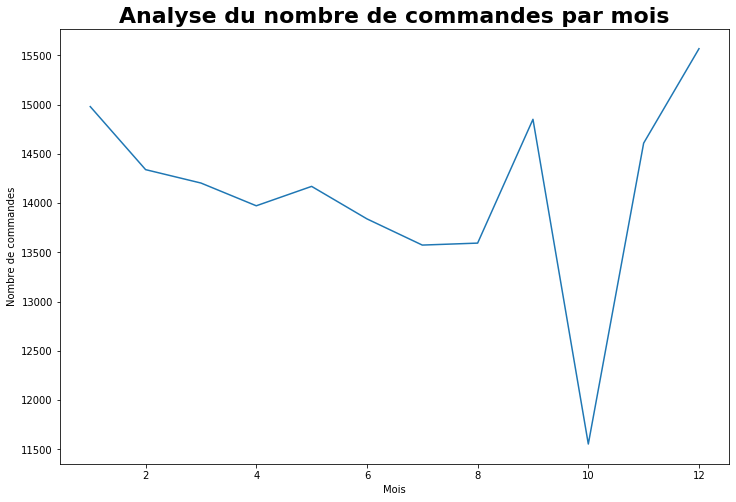

In [50]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
plt.plot(df_commandes['date_month'], df_commandes['session_id'])
plt.title("Analyse du nombre de commandes par mois", fontsize=22, fontweight='bold')
ax = ax.set(xlabel="Mois", ylabel="Nombre de commandes")
plt.show()

<div class="alert alert-block alert-warning">
    <b>Attention :</b> On remarque une forte chute au mois d'octobre 2021, il faut donc analyser ces lignes.
</div>

In [20]:
df_octobre = df_transactions[df_transactions['date_month'] == 10].groupby(['date_day']).agg(['nunique']).reset_index()
df_octobre

,date_day,id_prod,date,session_id,client_id,date_month,date_year
,,nunique,nunique,nunique,nunique,nunique,nunique
0,1,679,1043,504,446,1,1
1,2,465,687,354,317,1,1
2,3,456,677,361,326,1,1
3,4,430,639,359,328,1,1
4,5,439,632,367,344,1,1
5,6,474,726,370,334,1,1
6,7,415,623,337,304,1,1
7,8,485,713,380,337,1,1
8,9,471,675,365,323,1,1


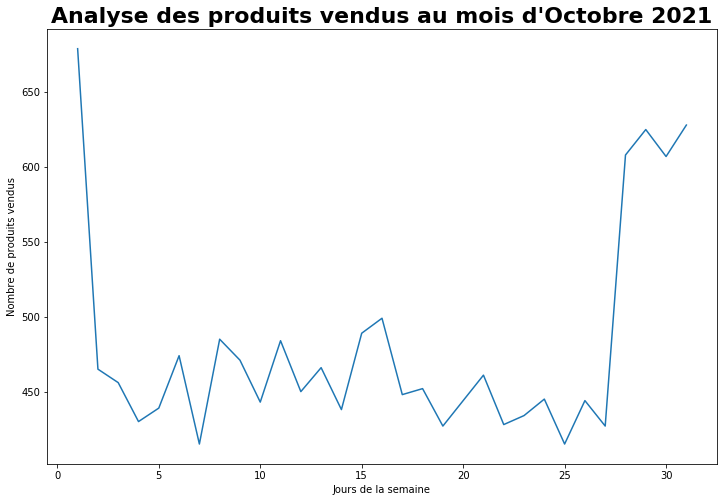

In [44]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
plt.plot(df_octobre['date_day'], df_octobre['id_prod'])
plt.title("Analyse des produits vendus au mois d'Octobre 2021", fontsize = 22, fontweight='bold')
ax = ax.set(xlabel='Jours de la semaine', ylabel='Nombre de produits vendus')
plt.show()

**Le nombre de références produits semble amputé entre le 2 et le 27 Octobre**.
Regardons quels produits manquent :

In [22]:
liste_produits = df_transactions['id_prod'].unique()
liste_produits_octobre = df_transactions[df_transactions['date_month'] == 10]['id_prod'].unique()

produits_manquants = set(liste_produits) - set(liste_produits_octobre)
liste_produits_manquants = list(produits_manquants)
print('Il manque', len(liste_produits_manquants), 'references produits au mois d\'octobre.')

Il manque 992 references produits au mois d'octobre.


Regardons les **moyennes des ventes de ces produits** sur l'année :

In [23]:
df_ventes_produits = df_transactions[df_transactions['id_prod'].isin(liste_produits_manquants) == True].groupby(['date_month', 'date_year']).agg(['nunique', 'count']).reset_index()
df_ventes_produits[['date_month', 'date_year', 'id_prod']]

date_month date_year id_prod      
                        nunique count
0           1      2022     534  1413
1           2      2022     520  1201
2           3      2021     508  1060
3           4      2021     505  1072
4           5      2021     498  1057
5           6      2021     479  1020
6           7      2021     476  1022
7           8      2021     491  1039
8           9      2021     552  1198
9          11      2021     516  1300
10         12      2021     535  1389

In [24]:
# Analyse des catégories vendues sur la période du 2 au 27 Octobre
df_transac_2_27_oct = df_transactions[(df_transactions['date_month'] == 10) & (df_transactions['date_day'] >= 2) & (df_transactions['date_day'] <= 27)]
categ_vendue_2_27_oct = df_products[df_products['id_prod'].isin(df_transac_2_27_oct['id_prod'].unique()) == True]['categ'].unique()
print(categ_vendue_2_27_oct)

[0 2]


<div class="alert alert-block alert-warning">
    <b>Attention :</b> On remarque donc que la catégorie 1 est totalement absente des produits vendus entre le 2 et le 27 Octobre. Il s'agit donc sans doute d'une erreur technique lors de l'extraction des données.<br/>
    Il faudra donc, en fonction des analyse, oublier le mois d'Octobre 2021 pour ne pas fausser les résultats des analyses.
</div>

Pour aller plus loin, il faut à présent **regrouper les 3 fichiers dans un dataframe étendu via une jointure Pandas**.

### <span style="color:#D97904" id="global">Création d'un dataframe global par jointure externe :</span>

In [25]:
df_ventes = pd.merge(df_transactions, df_customers, how='outer')

In [26]:
df_ventes = pd.merge(df_ventes, df_products, how='outer')

In [27]:
df_ventes.sort_values(by = ['date'])

,id_prod,date,session_id,client_id,date_day,date_month,date_year,sex,birth,price,categ
240516,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,1.0,3.0,2021.0,f,1967.0,11.99,0.0
236766,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,1.0,3.0,2021.0,m,1960.0,19.37,0.0
167448,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,1.0,3.0,2021.0,m,1988.0,4.50,0.0
43483,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,1.0,3.0,2021.0,f,1989.0,6.55,0.0
112567,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,1.0,3.0,2021.0,f,1956.0,16.49,0.0
...,...,...,...,...,...,...,...,...,...,...,...
336854,0_525,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0
336855,2_86,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.36,2.0
336856,0_299,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.99,0.0
336857,0_510,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.66,0.0


In [28]:
df_ventes.describe(include='all')

,id_prod,date,session_id,client_id,date_day,date_month,date_year,sex,birth,price,categ
count,336838,336816,336816,336837,336816.000000,336816.000000,336816.000000,336837,336837.000000,336735.000000,336735.000000
unique,3287,336816,169194,8621,NaN,NaN,NaN,2,NaN,NaN,NaN
top,1_369,2021-06-30 11:35:55.387896,s_118668,c_1609,NaN,NaN,NaN,m,NaN,NaN,NaN
freq,1081,1,14,12855,NaN,NaN,NaN,169251,NaN,NaN,NaN
first,NaN,2021-03-01 00:01:07.843138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-02-28 23:59:58.040472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,15.801628,6.482133,2021.174822,NaN,1977.823805,17.216434,0.430151
std,NaN,NaN,NaN,NaN,8.818357,3.519807,0.379816,NaN,13.524468,17.860955,0.591091
min,NaN,NaN,NaN,NaN,1.000000,1.000000,2021.000000,NaN,1929.000000,0.620000,0.000000
25%,NaN,NaN,NaN,NaN,8.000000,3.000000,2021.000000,NaN,1971.000000,8.610000,0.000000


In [29]:
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336859 entries, 0 to 336858
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336838 non-null  object        
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336816 non-null  object        
 3   client_id   336837 non-null  object        
 4   date_day    336816 non-null  float64       
 5   date_month  336816 non-null  float64       
 6   date_year   336816 non-null  float64       
 7   sex         336837 non-null  object        
 8   birth       336837 non-null  float64       
 9   price       336735 non-null  float64       
 10  categ       336735 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 30.8+ MB


### <span style="color:#D97904" id="manquant">Données manquantes sur le Dataframe étendu :</span>

**Liste des sessions vides :**
- Clients sans transactions
- Produits sans transactions

In [30]:
df_ventes[pd.isnull(df_ventes['session_id']) == True]

,id_prod,date,session_id,client_id,date_day,date_month,date_year,sex,birth,price,categ
336816,NaN,NaT,NaN,c_8253,NaN,NaN,NaN,f,2001.0,NaN,NaN
336817,NaN,NaT,NaN,c_3789,NaN,NaN,NaN,f,1997.0,NaN,NaN
336818,NaN,NaT,NaN,c_4406,NaN,NaN,NaN,f,1998.0,NaN,NaN
336819,NaN,NaT,NaN,c_2706,NaN,NaN,NaN,f,1967.0,NaN,NaN
336820,NaN,NaT,NaN,c_3443,NaN,NaN,NaN,m,1959.0,NaN,NaN
336821,NaN,NaT,NaN,c_4447,NaN,NaN,NaN,m,1956.0,NaN,NaN
336822,NaN,NaT,NaN,c_3017,NaN,NaN,NaN,f,1992.0,NaN,NaN
336823,NaN,NaT,NaN,c_4086,NaN,NaN,NaN,f,1992.0,NaN,NaN
336824,NaN,NaT,NaN,c_6930,NaN,NaN,NaN,m,2004.0,NaN,NaN
336825,NaN,NaT,NaN,c_4358,NaN,NaN,NaN,m,1999.0,NaN,NaN


<div class="alert alert-block alert-info">
    <b>Traitement :</b> Les clients et produits sans commandes seront écartés de l'analyse pour ne pas fausser les résultats.
</div>

In [31]:
df_ventes.drop(df_ventes[pd.isnull(df_ventes['session_id']) == True].index, inplace = True)

**Vérification des tarifs produits sur les transactions :**

Vérifions s'il existe des produits sans tarifs.

In [32]:
df_ventes[(pd.isnull(df_ventes['price']) == True) | (df_ventes['price'] == 0)].groupby(['id_prod']).agg(['count'])

,date,session_id,client_id,date_day,date_month,date_year,sex,birth,price,categ
,count,count,count,count,count,count,count,count,count,count
id_prod,,,,,,,,,,
0_2245,103,103,103,103,103,103,103,103,0,0


In [33]:
df_products[df_products['categ'] == 0].sort_values('price').describe()

,price,categ
count,2308.000000,2308.0
mean,11.732795,0.0
std,7.565755,0.0
min,0.620000,0.0
25%,5.587500,0.0
50%,10.320000,0.0
75%,16.655000,0.0
max,40.990000,0.0


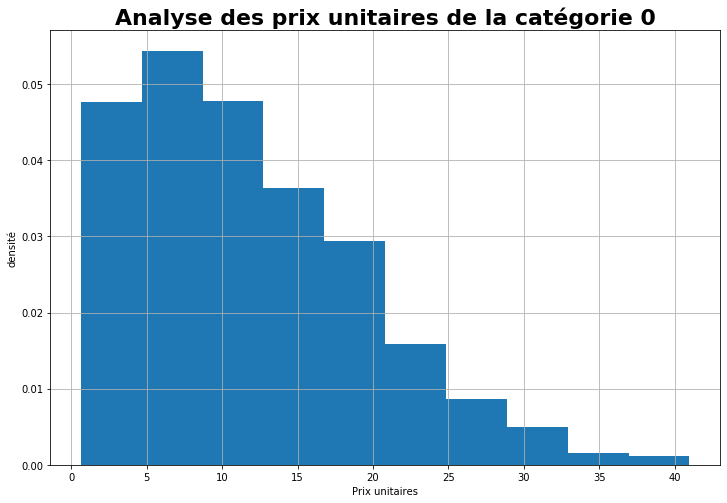

In [48]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
df_products[df_products['categ'] == 0]['price'].hist(density=True)
plt.title("Analyse des prix unitaires de la catégorie 0", fontsize=22, fontweight='bold')
ax = ax.set(xlabel = "Prix unitaires", ylabel = "densité")
plt.show()

<span style="color:green">La médiane des prix de la catégorie 0 se situe à 10,32 €.</span>
On peut donc ajouter l'article dans le dataframe Products et modifier les valeurs dans le dataframe ventes.

In [35]:
df_products.loc[3287] = ['0_2245',10.32,0]

In [36]:
df_ventes.loc[(df_ventes['id_prod'] == '0_2245'), 'price'] = df_products[df_products['categ'] == 0]['price'].median()
df_ventes.loc[(df_ventes['id_prod'] == '0_2245'), 'categ'] = 0

In [37]:
df_ventes.loc[df_ventes['id_prod'] == '0_2245']

,id_prod,date,session_id,client_id,date_day,date_month,date_year,sex,birth,price,categ
32299,0_2245,2021-04-10 06:15:32.619826,s_18510,c_277,10.0,4.0,2021.0,f,2000.0,10.32,0.0
32300,0_2245,2021-12-10 21:31:18.303110,s_132471,c_3519,10.0,12.0,2021.0,m,1974.0,10.32,0.0
32301,0_2245,2021-04-10 09:22:57.768041,s_18566,c_8240,10.0,4.0,2021.0,f,1978.0,10.32,0.0
32302,0_2245,2021-10-04 21:20:27.540982,s_100047,c_8138,4.0,10.0,2021.0,f,1984.0,10.32,0.0
32303,0_2245,2021-03-28 21:39:14.337424,s_12792,c_2688,28.0,3.0,2021.0,f,1968.0,10.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32397,0_2245,2021-03-28 10:46:04.804784,s_12567,c_966,28.0,3.0,2021.0,f,1981.0,10.32,0.0
32398,0_2245,2021-08-14 23:34:15.559623,s_75819,c_5157,14.0,8.0,2021.0,f,1979.0,10.32,0.0
32399,0_2245,2021-10-15 09:31:31.539354,s_105069,c_4188,15.0,10.0,2021.0,f,1935.0,10.32,0.0
32400,0_2245,2021-05-20 07:44:21.415061,s_36985,c_1450,20.0,5.0,2021.0,f,1959.0,10.32,0.0


<div class="alert alert-block alert-info">
<b>Traitement :</b> Les dataframes df_products et df_ventes ont été traités pour <b>estimer les tarifs manquant du produit 0_2245</b> afin de ne pas fausser les analyses <em>(103 lignes)</em>.
</div>

In [38]:
df_ventes.head()

,id_prod,date,session_id,client_id,date_day,date_month,date_year,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,10.0,4.0,2021.0,f,1977.0,4.99,0.0
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,27.0,12.0,2021.0,f,1981.0,4.99,0.0
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,27.0,10.0,2021.0,m,1985.0,4.99,0.0
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,4.0,7.0,2021.0,f,1989.0,4.99,0.0
4,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,19.0,9.0,2021.0,m,1980.0,4.99,0.0


In [39]:
# Conversion du mois numérique en lettre.
import calendar
import locale
locale.setlocale(locale.LC_ALL, 'fr_FR')

'fr_FR'

In [40]:
# ATTENTION : Traitement très long !
mois = []
for i,row in df_ventes.iterrows():
    mois_convert = int(row['date_month'])
    mois_calendar = calendar.month_name[mois_convert]
    mois.append(mois_calendar)
df_ventes['month'] = mois

In [41]:
df_ventes.head()

,id_prod,date,session_id,client_id,date_day,date_month,date_year,sex,birth,price,categ,month
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,10.0,4.0,2021.0,f,1977.0,4.99,0.0,avril
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,27.0,12.0,2021.0,f,1981.0,4.99,0.0,décembre
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,27.0,10.0,2021.0,m,1985.0,4.99,0.0,octobre
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,4.0,7.0,2021.0,f,1989.0,4.99,0.0,juillet
4,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,19.0,9.0,2021.0,m,1980.0,4.99,0.0,septembre


### Exportation du fichier final :

In [42]:
df_ventes.to_csv('exports/transactions_etendues.csv', index = False)